In [56]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")
print(hist)

                  Open        High         Low       Close      Volume  \
Date                                                                     
1986-03-13    0.056108    0.064359    0.056108    0.061608  1031788800   
1986-03-14    0.061608    0.064909    0.061608    0.063809   308160000   
1986-03-17    0.063809    0.065459    0.063809    0.064909   133171200   
1986-03-18    0.064909    0.065459    0.062708    0.063258    67766400   
1986-03-19    0.063258    0.063809    0.061608    0.062158    47894400   
...                ...         ...         ...         ...         ...   
2021-07-23  287.369995  289.989990  286.500000  289.670013    22753500   
2021-07-26  289.000000  289.690002  286.640015  289.049988    23154000   
2021-07-27  289.429993  289.579987  282.950012  286.540009    32667900   
2021-07-28  288.989990  290.149994  283.829987  286.220001    33566900   
2021-07-29  286.239990  288.619995  286.079987  286.500000    18117200   

            Dividends  Stock Splits  

<AxesSubplot:xlabel='Date'>

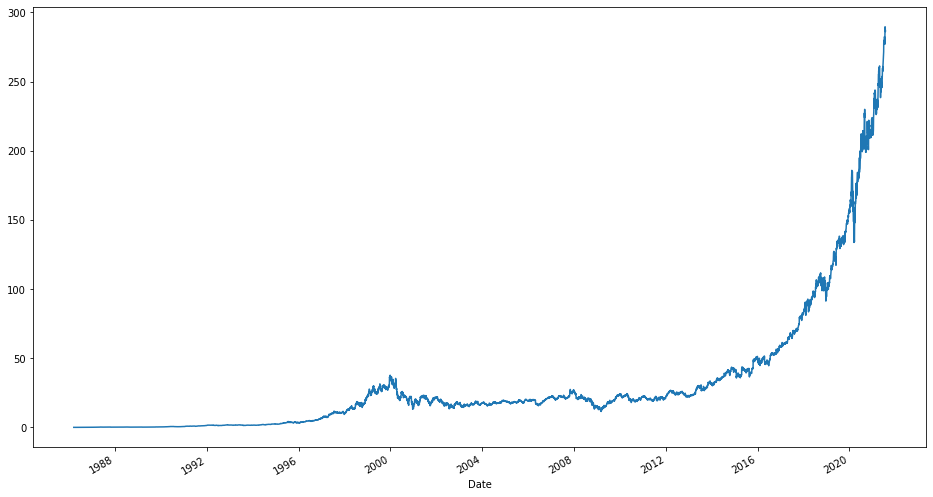

In [57]:
import matplotlib.pyplot as plt
import seaborn

# Plot everything by leveraging the very powerful matplotlib package
hist['Close'].plot(figsize=(16, 9))

In [58]:
yf.download("MSFT", start="2021-07-01", end="2021-07-22")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-30,270.690002,271.359985,269.600006,270.899994,270.899994,21656500
2021-07-01,269.609985,271.839996,269.600006,271.600006,271.600006,16725300
2021-07-02,272.820007,278.000000,272.500000,277.649994,277.649994,26458000
2021-07-06,278.029999,279.369995,274.299988,277.660004,277.660004,31565600
2021-07-07,279.399994,280.690002,277.149994,279.929993,279.929993,23260000
2021-07-08,276.899994,278.730011,274.869995,277.420013,277.420013,24618600
2021-07-09,275.720001,278.049988,275.320007,277.940002,277.940002,23905500
2021-07-12,279.160004,279.769989,276.579987,277.320007,277.320007,18931700
2021-07-13,277.519989,282.850006,277.390015,280.980011,280.980011,26120100


In [134]:
import pandas as pd

class DataLoader:

    @classmethod
    def load_data(self, filename: str) -> pd.DataFrame:
        data = pd.read_csv(filename, parse_dates=[0]).set_index("Date")
        return data

    @classmethod
    def split_data(self, df: pd.DataFrame, start: str, end: str) -> pd.DataFrame:
        return df.loc[start:end, :]

    @classmethod
    def fetch_data(self, ticker: str, start: str, end: str, interval: str = "1d", save=True) -> pd.DataFrame:
        '''
        if interval is 1h: you can only fetch 730 days.
        if interval is 15m: you can only fetch 60 days.
        '''
        data = yf.download(ticker, start=start, end=end, interval=interval)
        data = data.reset_index().rename(columns={'index': 'Date'})
        if interval != "1d":
            data["Date"] = data["Date"].apply(lambda x: x.strftime('%Y-%m-%d %H:%M'))
        data["Close"] = data["Adj Close"]
        data = data.drop(["Adj Close"], axis=1)
        data = data.set_index("Date")    
        return data

In [135]:
df = DataLoader.fetch_data('BTC-USD', "2020-01-01", "2021-07-01", interval='1h')

[*********************100%***********************]  1 of 1 completed


In [136]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31 15:00,7259.739746,7294.439453,7252.387207,7252.396973,0
2019-12-31 16:00,7250.235840,7270.934570,7250.235840,7263.691406,0
2019-12-31 17:00,7263.693359,7265.294434,7224.892090,7228.004395,0
2019-12-31 18:00,7224.267090,7229.509766,7208.828613,7225.416016,15923200
2019-12-31 19:00,7225.662109,7235.997559,7218.113281,7230.913574,10078208


In [137]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-06-30 11:00,34634.703125,34830.687500,34593.363281,34776.207031,0
2021-06-30 12:00,34754.140625,34993.367188,34586.898438,34920.375000,0
2021-06-30 13:00,34869.851562,35000.808594,34592.386719,34693.320312,0
2021-06-30 14:00,34657.242188,34719.609375,34484.968750,34718.695312,0
2021-06-30 15:00,34748.964844,34808.027344,34539.691406,34637.195312,0


In [138]:
len(df) - len(df[df["Volume"] == 0])

6752

In [139]:
DataLoader.split_data(df, "2021-01-01", "2021-05-30")

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-01 00:00,28994.009766,29033.222656,28803.585938,29032.312500,0
2021-01-01 01:00,29027.828125,29458.738281,29027.828125,29411.566406,77246464
2021-01-01 02:00,29410.250000,29451.232422,29228.302734,29228.789062,250859520
2021-01-01 03:00,29229.537109,29335.023438,29226.875000,29330.333984,0
2021-01-01 04:00,29328.734375,29391.267578,29178.972656,29252.201172,3588096
...,...,...,...,...,...
2021-05-29 19:00,33937.019531,34175.375000,33693.929688,34018.503906,0
2021-05-29 20:00,34058.843750,34164.648438,33729.363281,34102.449219,0
2021-05-29 21:00,34057.238281,34453.460938,33811.960938,34153.093750,0
